In [1]:
from sklearn.tree import DecisionTreeRegressor

from model_utils import load_dataset, run_experiment, print_results, plot_residuals

In [2]:
dataset = load_dataset()

100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:21<00:00,  1.05it/s]


In [3]:
for test_score in ['sat_math', 'sat_ebrw']:
    dataset['testscores;{}_delta'.format(test_score)] = \
        dataset.apply(lambda r: r['testscores;{}_2022'.format(test_score)] - r['testscores;{}_2019'.format(test_score)],
                      axis=1)
    
for test_score in ['math_4', 'math_8', 'reading_4', 'reading_8']:
    dataset['testscores;{}_delta'.format(test_score)] = \
        dataset.apply(lambda r: r['testscores;{}_2022'.format(test_score)] - r['testscores;{}_2019'.format(test_score)],
                      axis=1)

<a id='models'></a>

# DECISION TREE REGRESSION MODELS

Average the entire year of data for each district. Same model is used for all states.

This yields only ~173 rows, so we use k-fold Cross Validation to measure model performance. _Note that the folds are constructed to ensure that all data from a given state is in either the test or train split._

All models use engagement data (split by product type), locale type data, and broadband data, but not the socioeconomic data due to missing data issues that would reduce the size of the dataset.

### 4th and 8th Grade Test Score (& Change) Trees

Each baseline trains 4 decision tree models (default sklearn parameters), one for each combination of 4th & 8th grade, math & reading test scores, using 5-fold cross-validation. The target variable is either the raw 2022 test scores or the magnitude of the change in test scores from 2019 to 2022, i.e., $score_{2022} - score_{2019}$. 

- ___Tree 1a___: Predict raw test scores. ([Model](#tree1a_model) / [Results](#tree1a_results))
- ___Tree 1b___: Predict change in test scores. ([Model](#tree1b_model) / [Results](#tree1b_results))

### SAT Score (& Change) Trees

Each baseline trains 2 decision tree models (default sklearn parameters), one for math and one for reading SAT scores, using 5-fold cross-validation. The target variable is either the raw 2022 test scores or the magnitude of the change in test scores from 2019 to 2022, i.e., $score_{2022} - score_{2019}$. 

- ___Tree 1c___: Predict raw test scores. ([Model](#tree1c_model) / [Results](#tree1c_results))
- ___Tree 1d___: Predict change in test scores. ([Model](#tree1d_model) / [Results](#tree1d_results))

<a id='tree1a_model'></a>

## Decision Tree 1a: Predict 8th and 4th Grade Test Scores from All Data

[(Back to top)](#models)

In [4]:
FEATURES = ['engagement;avg_SDO',
            'engagement;avg_CM',
            'engagement;avg_LC', 
            'engagement;avg_LC_CM_SDO', 
            'engagement;avg_Missing',
            'districts;locale_city', 
            'districts;locale_suburb', 
            'districts;locale_town',
            'districts;locale_rural',
            'broadband;wired_over_25',
            'broadband;avg_mbps', 
            'broadband;frac_access', 
            'broadband;lowest_price']

TARGETS = ['testscores;math_4_2022', 
           'testscores;math_8_2022', 
           'testscores;reading_4_2022', 
           'testscores;reading_8_2022']

five_fold_results = run_experiment(dataset, 
                                   FEATURES,
                                   TARGETS,
                                   DecisionTreeRegressor(), 
                                   n_splits=5)


Dataset for testscores;math_4_2022 has 174 samples after filtering
Dataset for testscores;math_8_2022 has 173 samples after filtering
Dataset for testscores;reading_4_2022 has 174 samples after filtering
Dataset for testscores;reading_8_2022 has 173 samples after filtering


<a id='tree1a_results'></a>

### Decision Tree 1a Testing Results

[(Back to top)](#models)

In [6]:
print_results(five_fold_results, splits=['test'])

,testscores;math_4_2022
test_r2,-1.1016
test_root_mean_squared_error,9.5355


testscores;math_4_2022: 9.5355


,testscores;math_8_2022
test_r2,-1.3464
test_root_mean_squared_error,8.3300


testscores;math_8_2022: 8.33


,testscores;reading_4_2022
test_r2,-1.3291
test_root_mean_squared_error,10.1188


testscores;reading_4_2022: 10.1188


,testscores;reading_8_2022
test_r2,-1.8955
test_root_mean_squared_error,7.8956


testscores;reading_8_2022: 7.8956


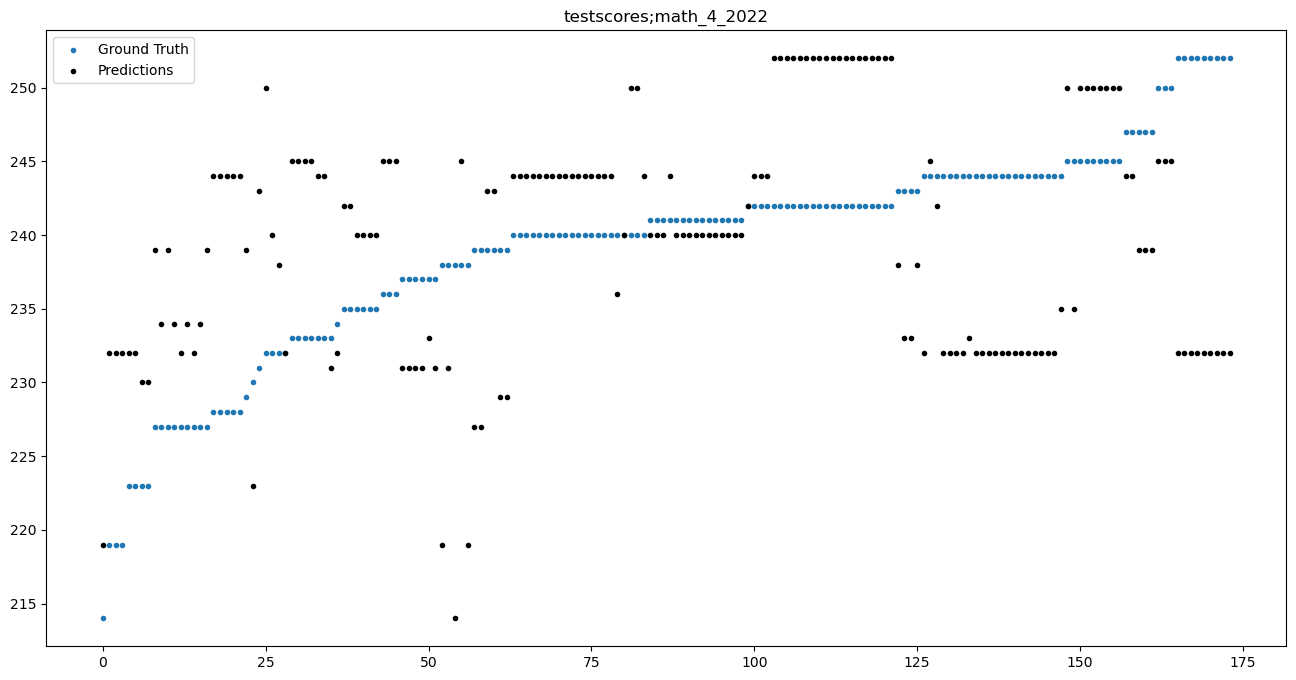

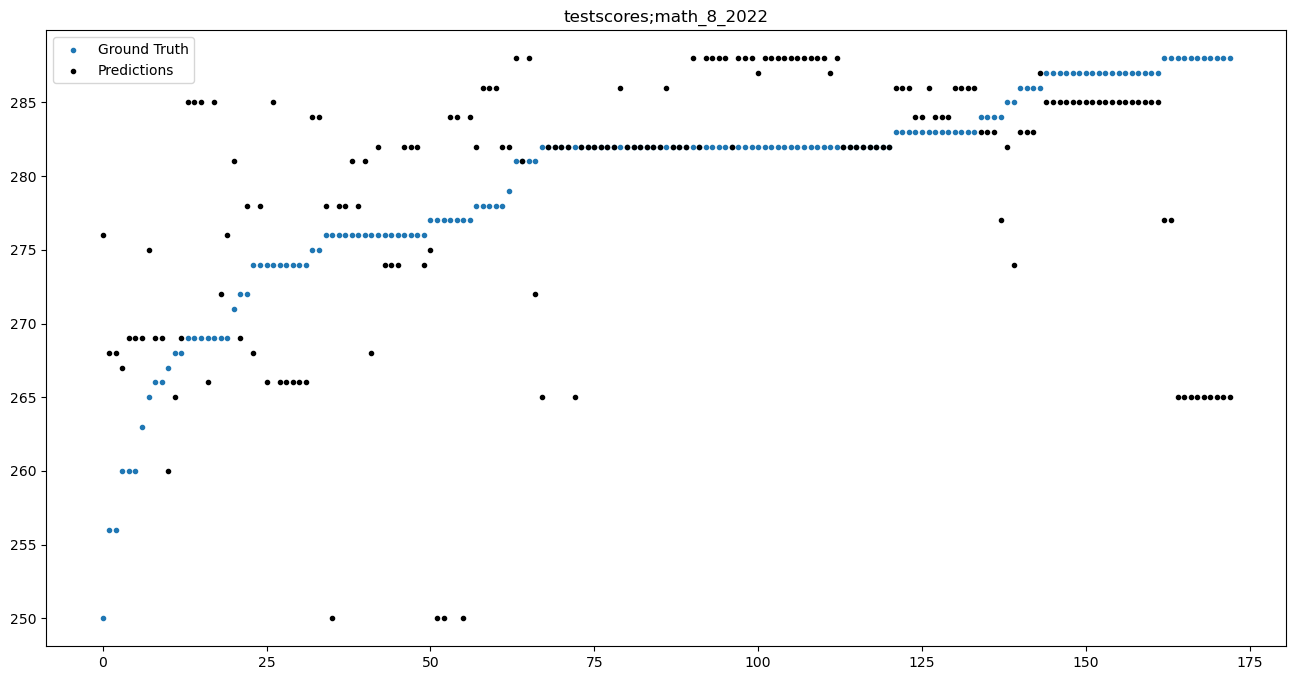

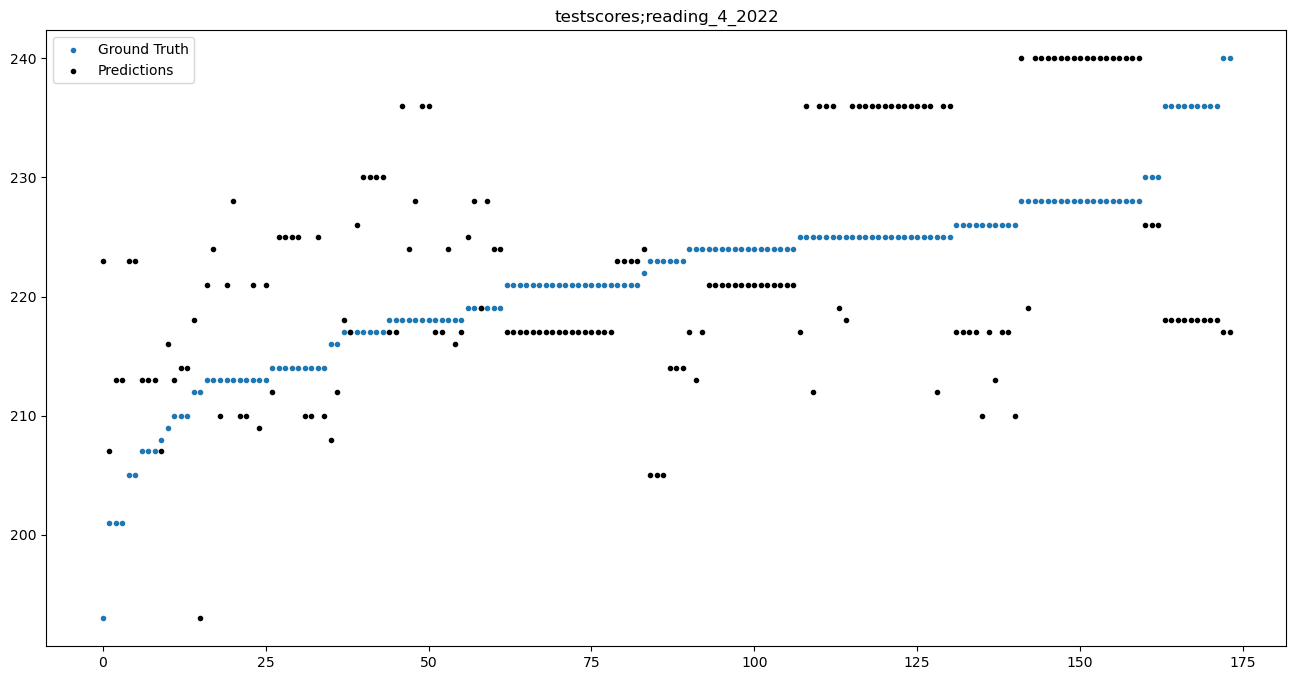

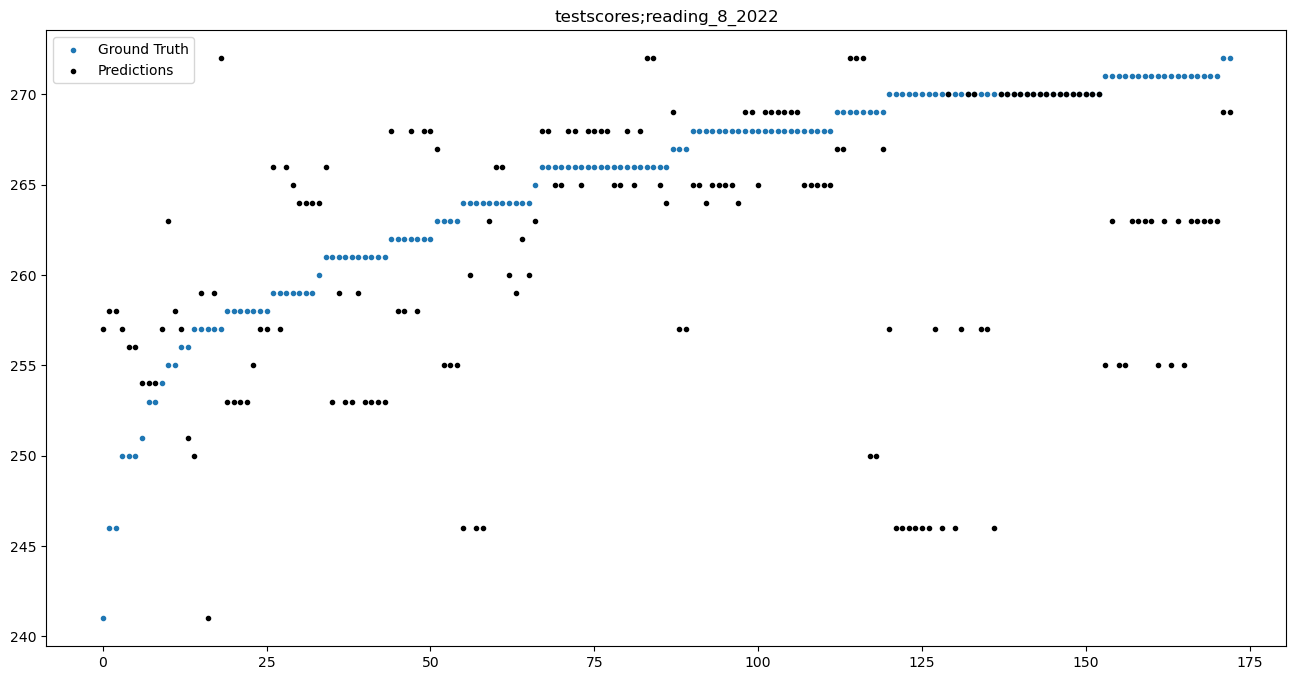

In [7]:
plot_residuals(five_fold_results)

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

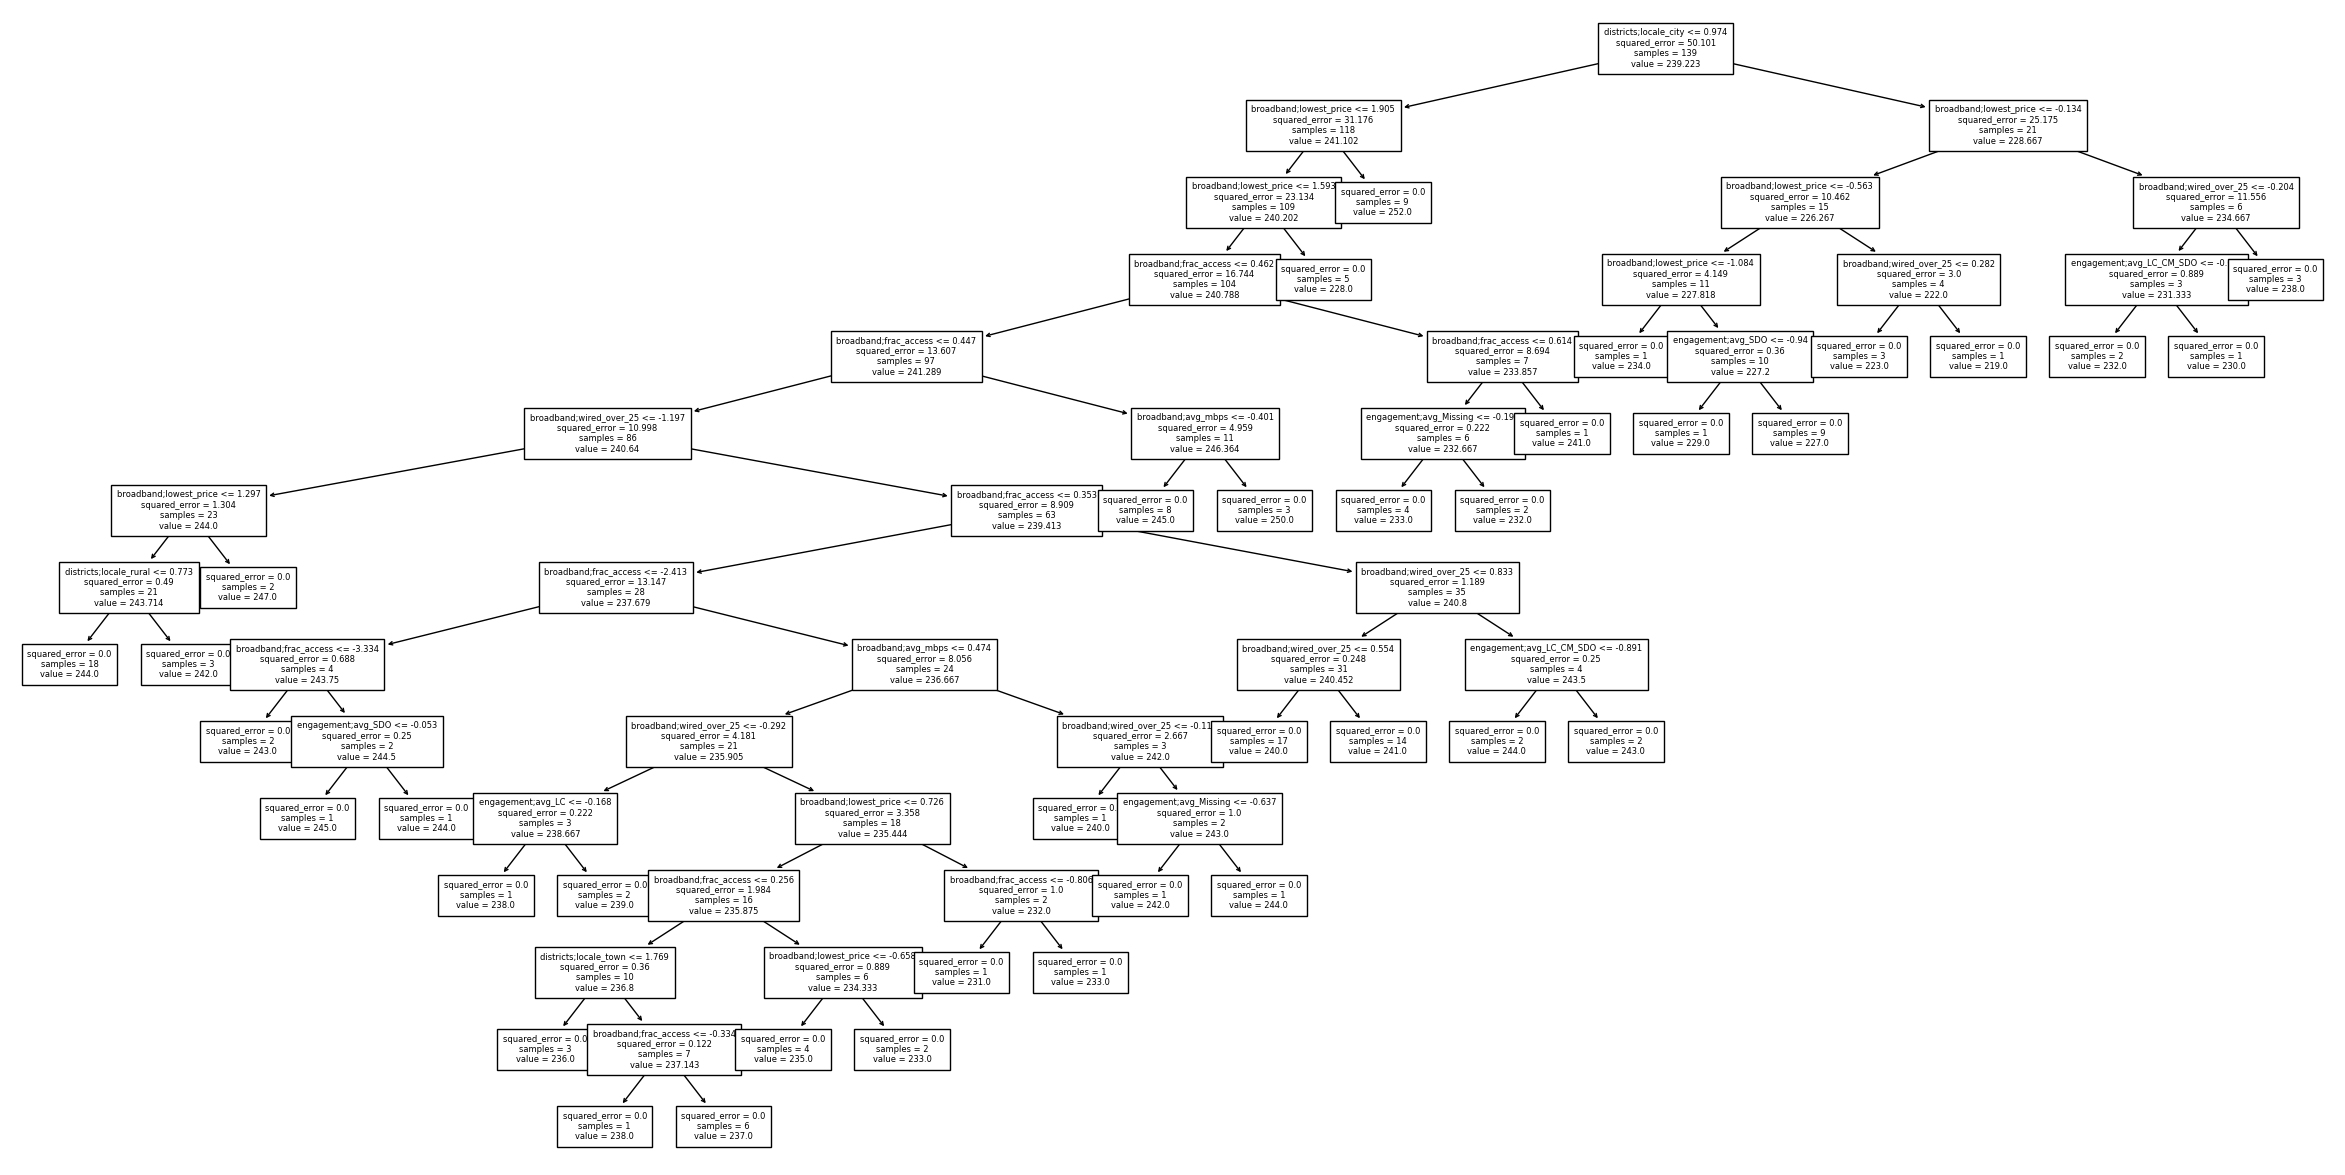

In [10]:
fig, ax = plt.subplots(figsize=(30,15))
plot_tree(five_fold_results[0][0]['estimator'][0]['decisiontreeregressor'], 
          feature_names=['engagement;avg_SDO',
                         'engagement;avg_CM',
                         'engagement;avg_LC', 
                         'engagement;avg_LC_CM_SDO', 
                         'engagement;avg_Missing',
                         'districts;locale_city', 
                         'districts;locale_suburb', 
                         'districts;locale_town',
                         'districts;locale_rural',
                         'broadband;wired_over_25',
                         'broadband;avg_mbps', 
                         'broadband;frac_access', 
                         'broadband;lowest_price'],
          filled=False,
          fontsize=6,
          ax=ax);

<a id='tree1b_model'></a>

## Decision Tree 1b: Predict Change In 8th and 4th Grade Test Scores from All Data

[(Back to top)](#models)

In [11]:
FEATURES = ['engagement;avg_SDO',
            'engagement;avg_CM',
            'engagement;avg_LC', 
            'engagement;avg_LC_CM_SDO', 
            'engagement;avg_Missing',
            'districts;locale_city', 
            'districts;locale_suburb', 
            'districts;locale_town',
            'districts;locale_rural',
            'broadband;wired_over_25',
            'broadband;avg_mbps', 
            'broadband;frac_access', 
            'broadband;lowest_price']

TARGETS = ['testscores;math_4_delta', 
           'testscores;math_8_delta', 
           'testscores;reading_4_delta', 
           'testscores;reading_8_delta']

five_fold_results = run_experiment(dataset, 
                                   FEATURES,
                                   TARGETS,
                                   DecisionTreeRegressor(), 
                                   n_splits=5)


Dataset for testscores;math_4_delta has 174 samples after filtering
Dataset for testscores;math_8_delta has 173 samples after filtering
Dataset for testscores;reading_4_delta has 174 samples after filtering
Dataset for testscores;reading_8_delta has 173 samples after filtering


<a id='tree1b_results'></a>

### Decision Tree 1b Testing Results

[(Back to top)](#models)

In [15]:
print_results(five_fold_results, splits=['test'])

,testscores;math_4_delta
test_r2,-1.7782
test_root_mean_squared_error,5.4776


testscores;math_4_delta: 5.4776


,testscores;math_8_delta
test_r2,-1.1461
test_root_mean_squared_error,4.3583


testscores;math_8_delta: 4.3583


,testscores;reading_4_delta
test_r2,-2.7003
test_root_mean_squared_error,4.9881


testscores;reading_4_delta: 4.9881


,testscores;reading_8_delta
test_r2,-1.6242
test_root_mean_squared_error,5.0141


testscores;reading_8_delta: 5.0141


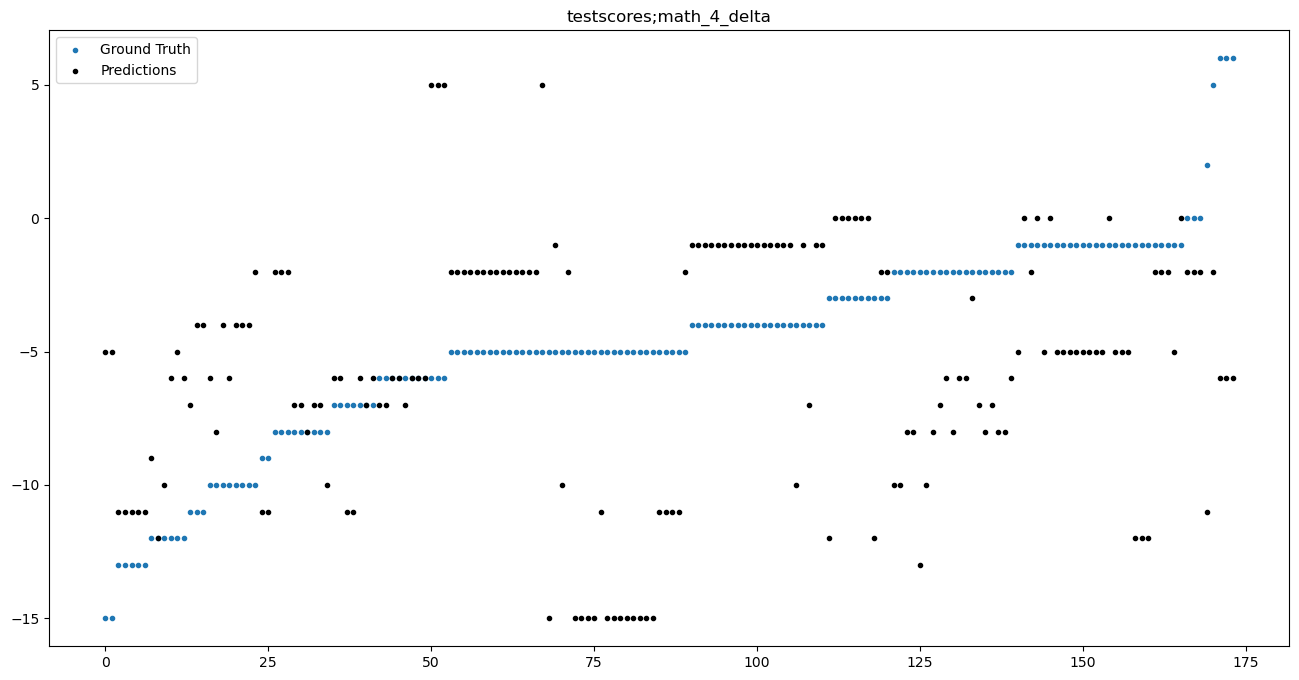

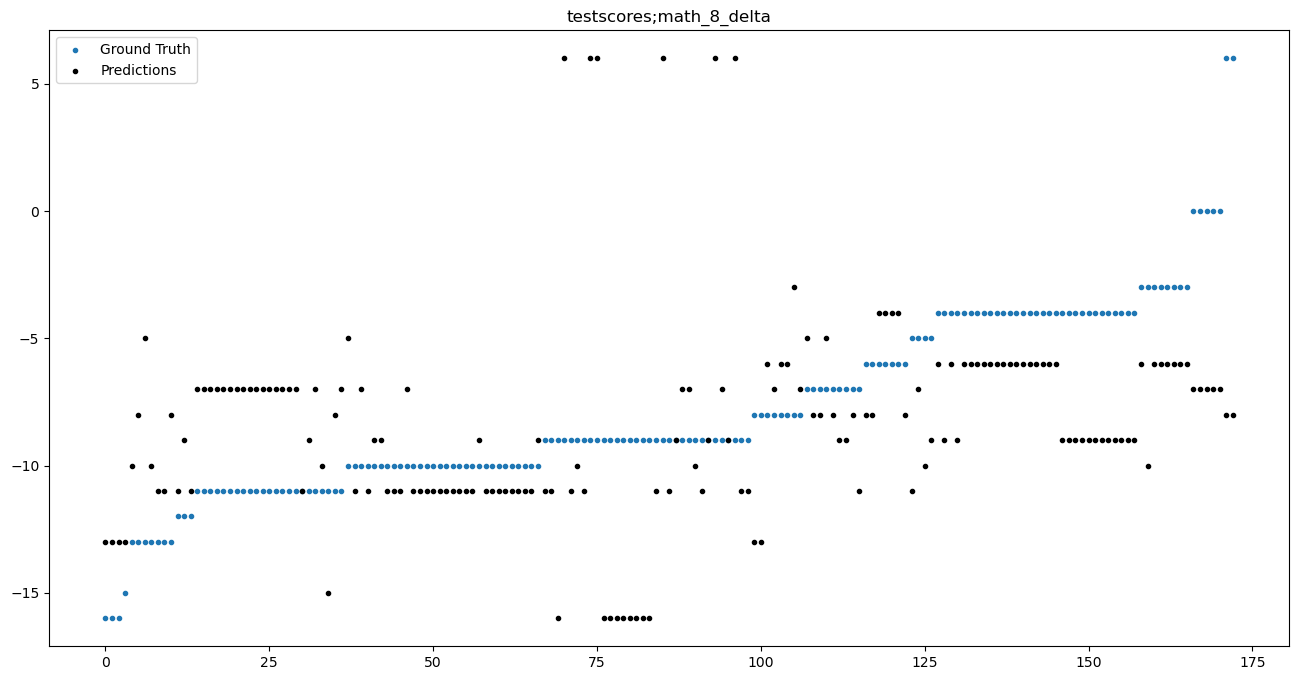

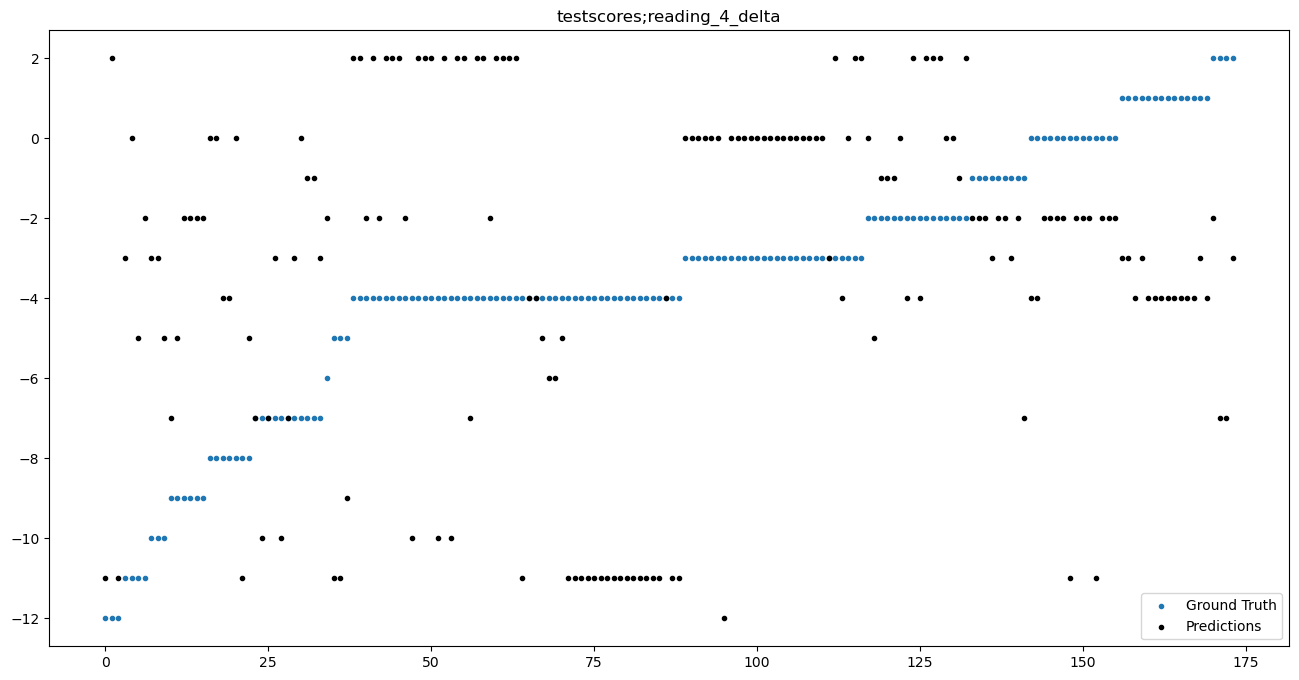

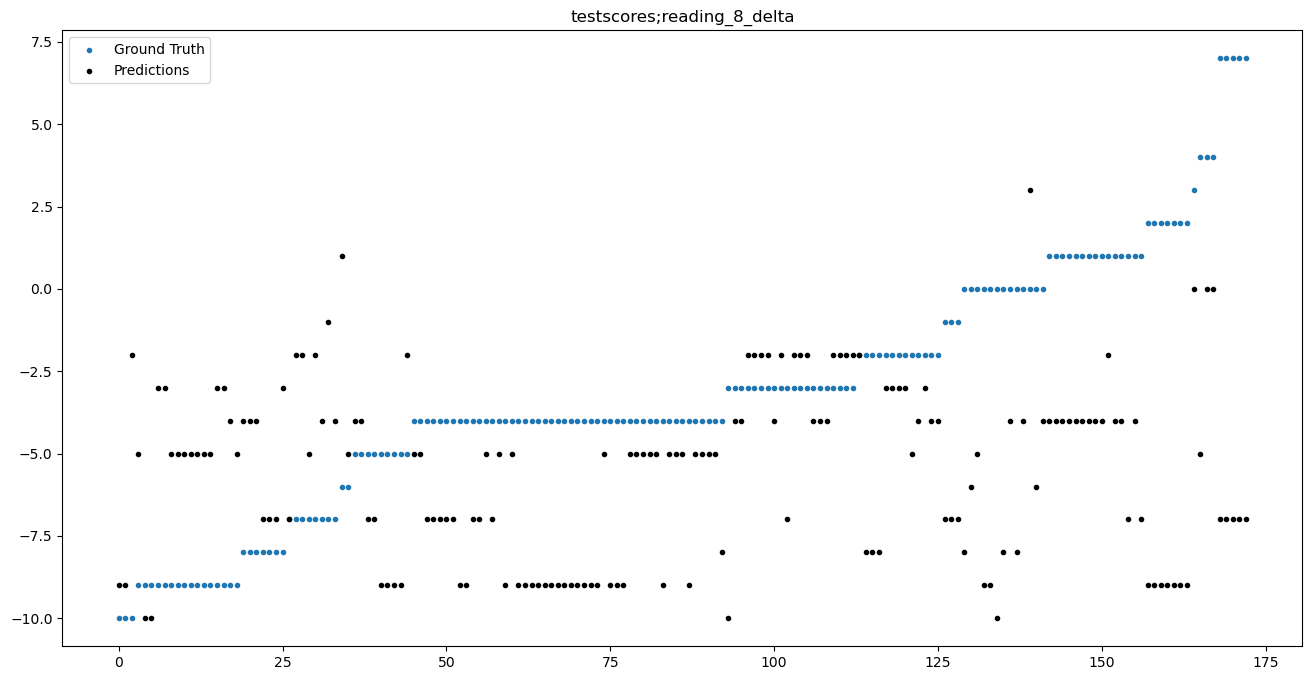

In [16]:
plot_residuals(five_fold_results)

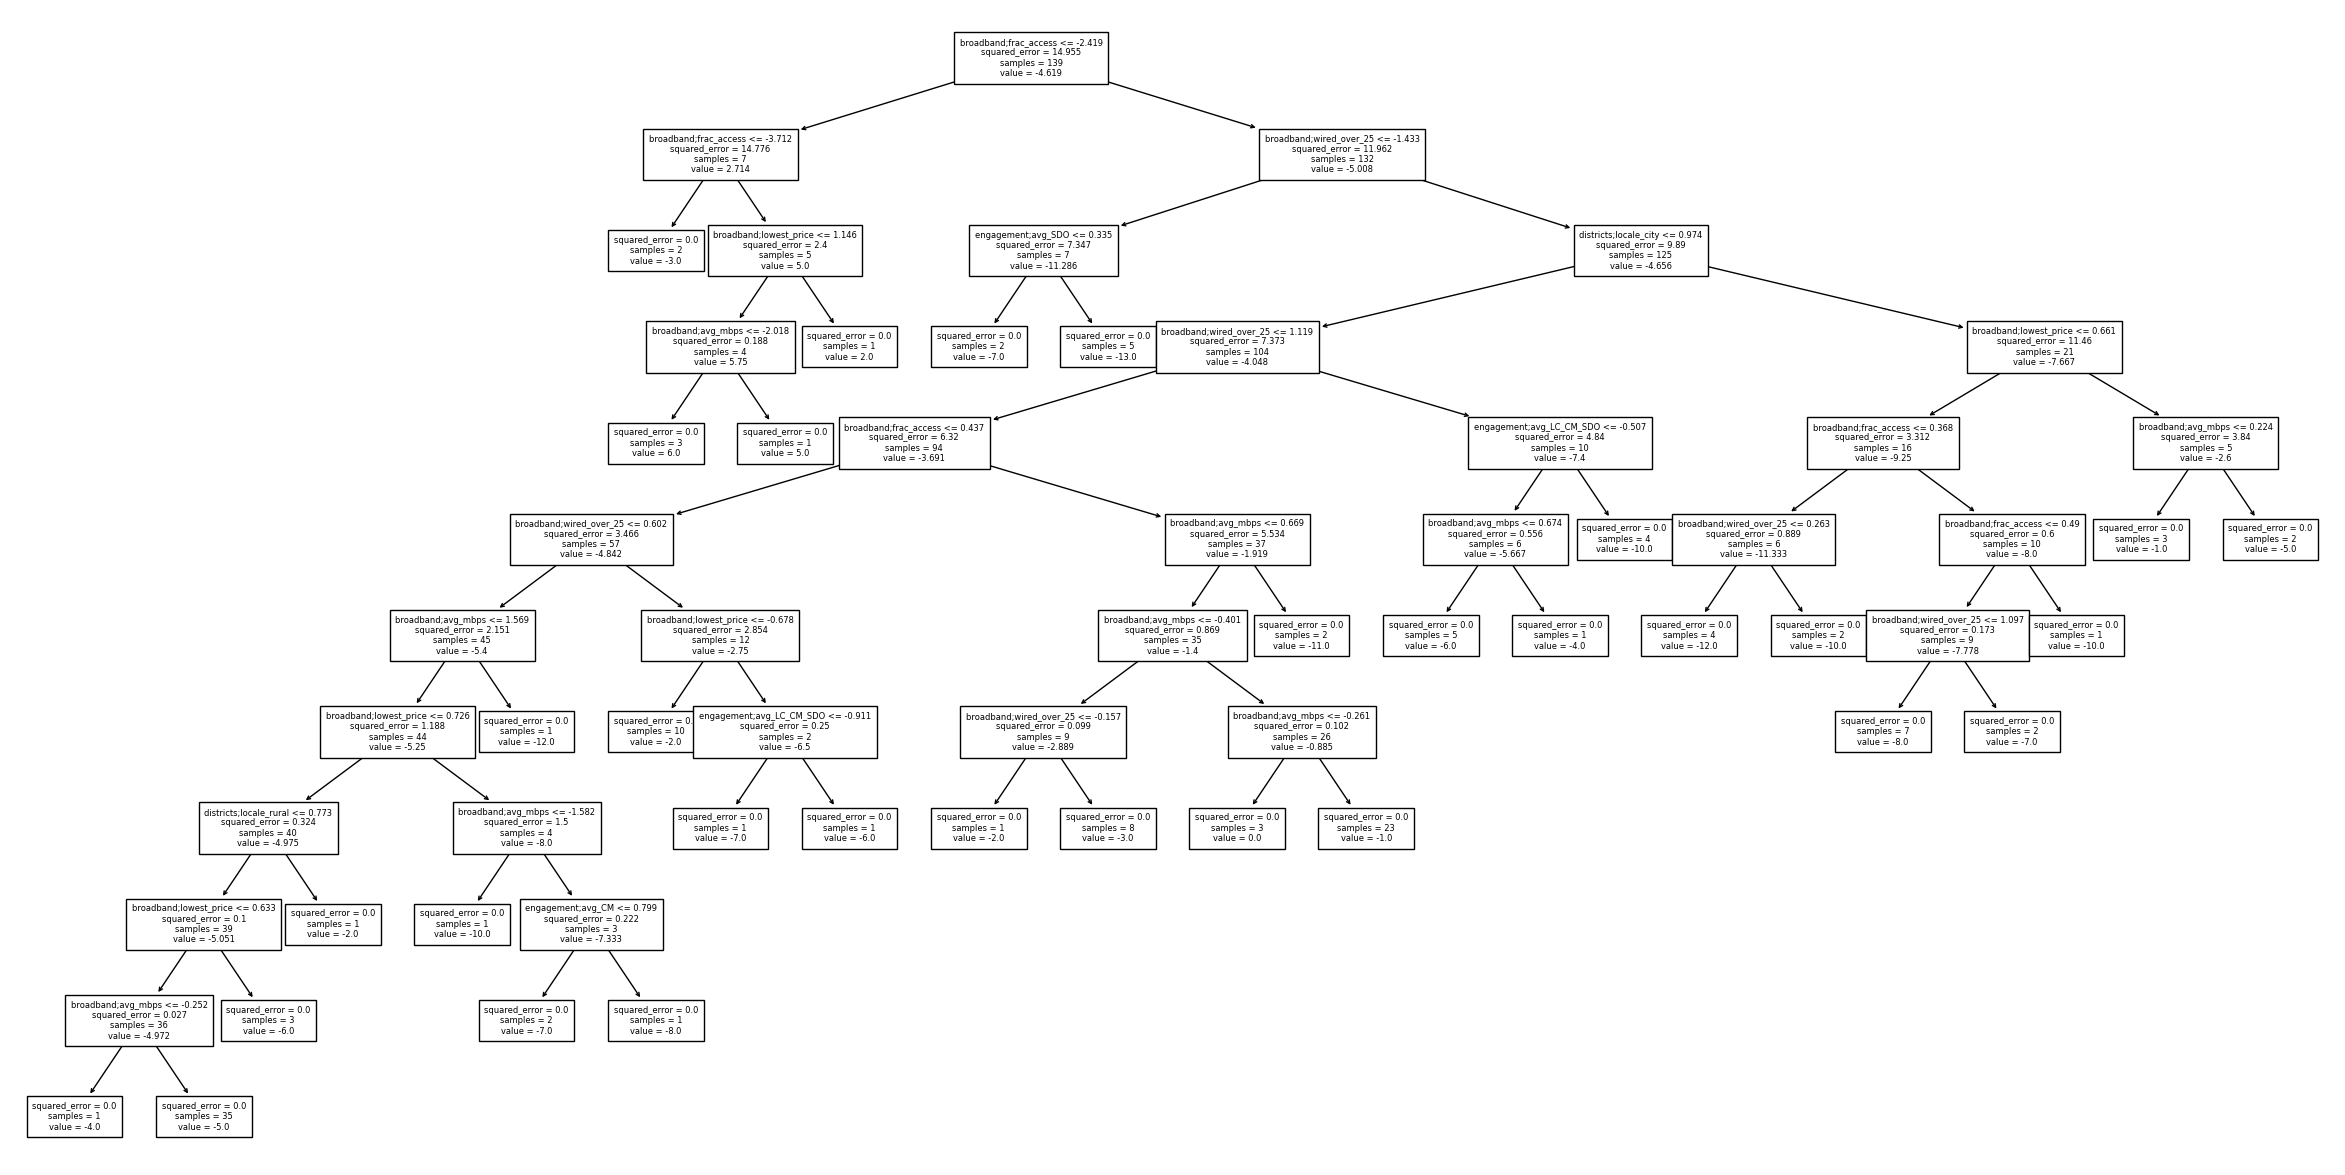

In [17]:
fig, ax = plt.subplots(figsize=(30,15))
plot_tree(five_fold_results[0][0]['estimator'][0]['decisiontreeregressor'], 
          feature_names=['engagement;avg_SDO',
                         'engagement;avg_CM',
                         'engagement;avg_LC', 
                         'engagement;avg_LC_CM_SDO', 
                         'engagement;avg_Missing',
                         'districts;locale_city', 
                         'districts;locale_suburb', 
                         'districts;locale_town',
                         'districts;locale_rural',
                         'broadband;wired_over_25',
                         'broadband;avg_mbps', 
                         'broadband;frac_access', 
                         'broadband;lowest_price'],
          filled=False,
          fontsize=6,
          ax=ax);

<a id='tree1c_model'></a>

## Decision Tree 1c: Predict SAT Scores from All Data

[(Back to top)](#models)

In [18]:
FEATURES = ['engagement;avg_SDO',
            'engagement;avg_CM',
            'engagement;avg_LC', 
            'engagement;avg_LC_CM_SDO', 
            'engagement;avg_Missing',
            'districts;locale_city', 
            'districts;locale_suburb', 
            'districts;locale_town',
            'districts;locale_rural',
            'broadband;wired_over_25',
            'broadband;avg_mbps', 
            'broadband;frac_access', 
            'broadband;lowest_price']

TARGETS = ['testscores;sat_math_2022', 
           'testscores;sat_ebrw_2022']

five_fold_results = run_experiment(dataset, 
                                   FEATURES,
                                   TARGETS,
                                   DecisionTreeRegressor(), 
                                   n_splits=5)


Dataset for testscores;sat_math_2022 has 176 samples after filtering
Dataset for testscores;sat_ebrw_2022 has 176 samples after filtering


<a id='tree1c_results'></a>

### Decision Tree 1c Testing Results

[(Back to top)](#models)

In [19]:
print_results(five_fold_results, splits=['test'])

,testscores;sat_math_2022
test_r2,-1.4248
test_root_mean_squared_error,44.8545


testscores;sat_math_2022: 44.8545


,testscores;sat_ebrw_2022
test_r2,-1.9362
test_root_mean_squared_error,49.3659


testscores;sat_ebrw_2022: 49.3659


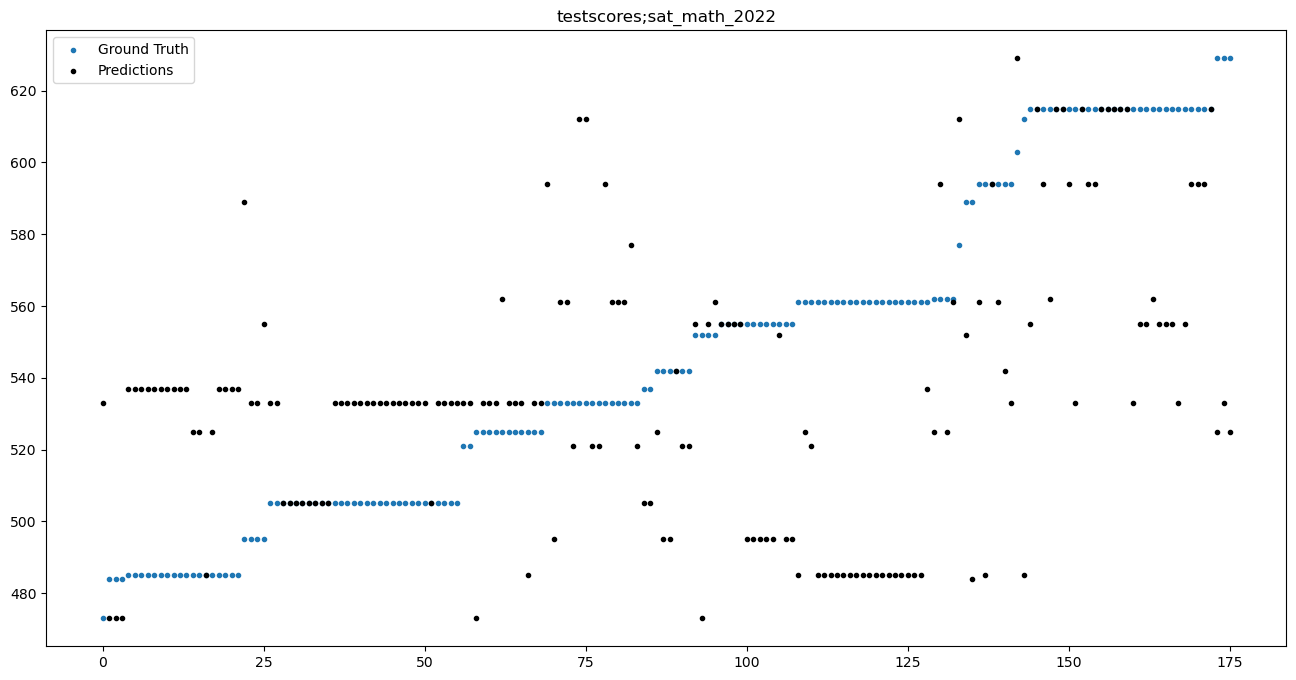

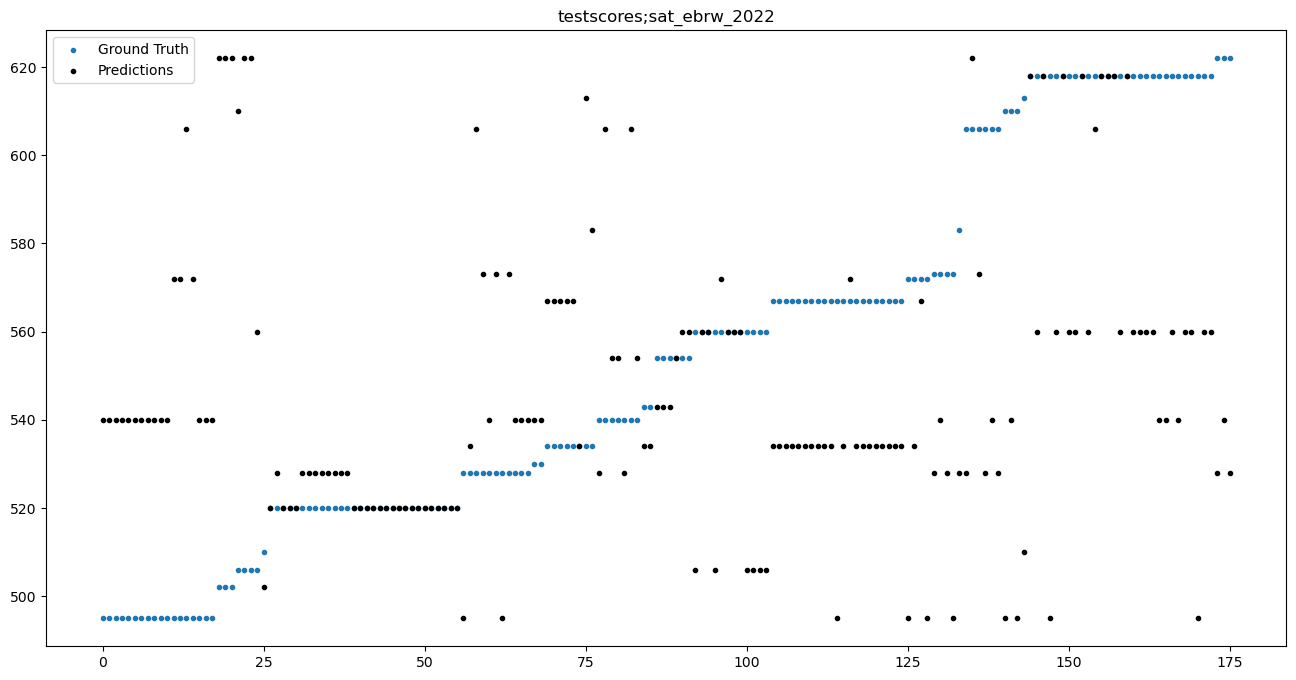

In [20]:
plot_residuals(five_fold_results)

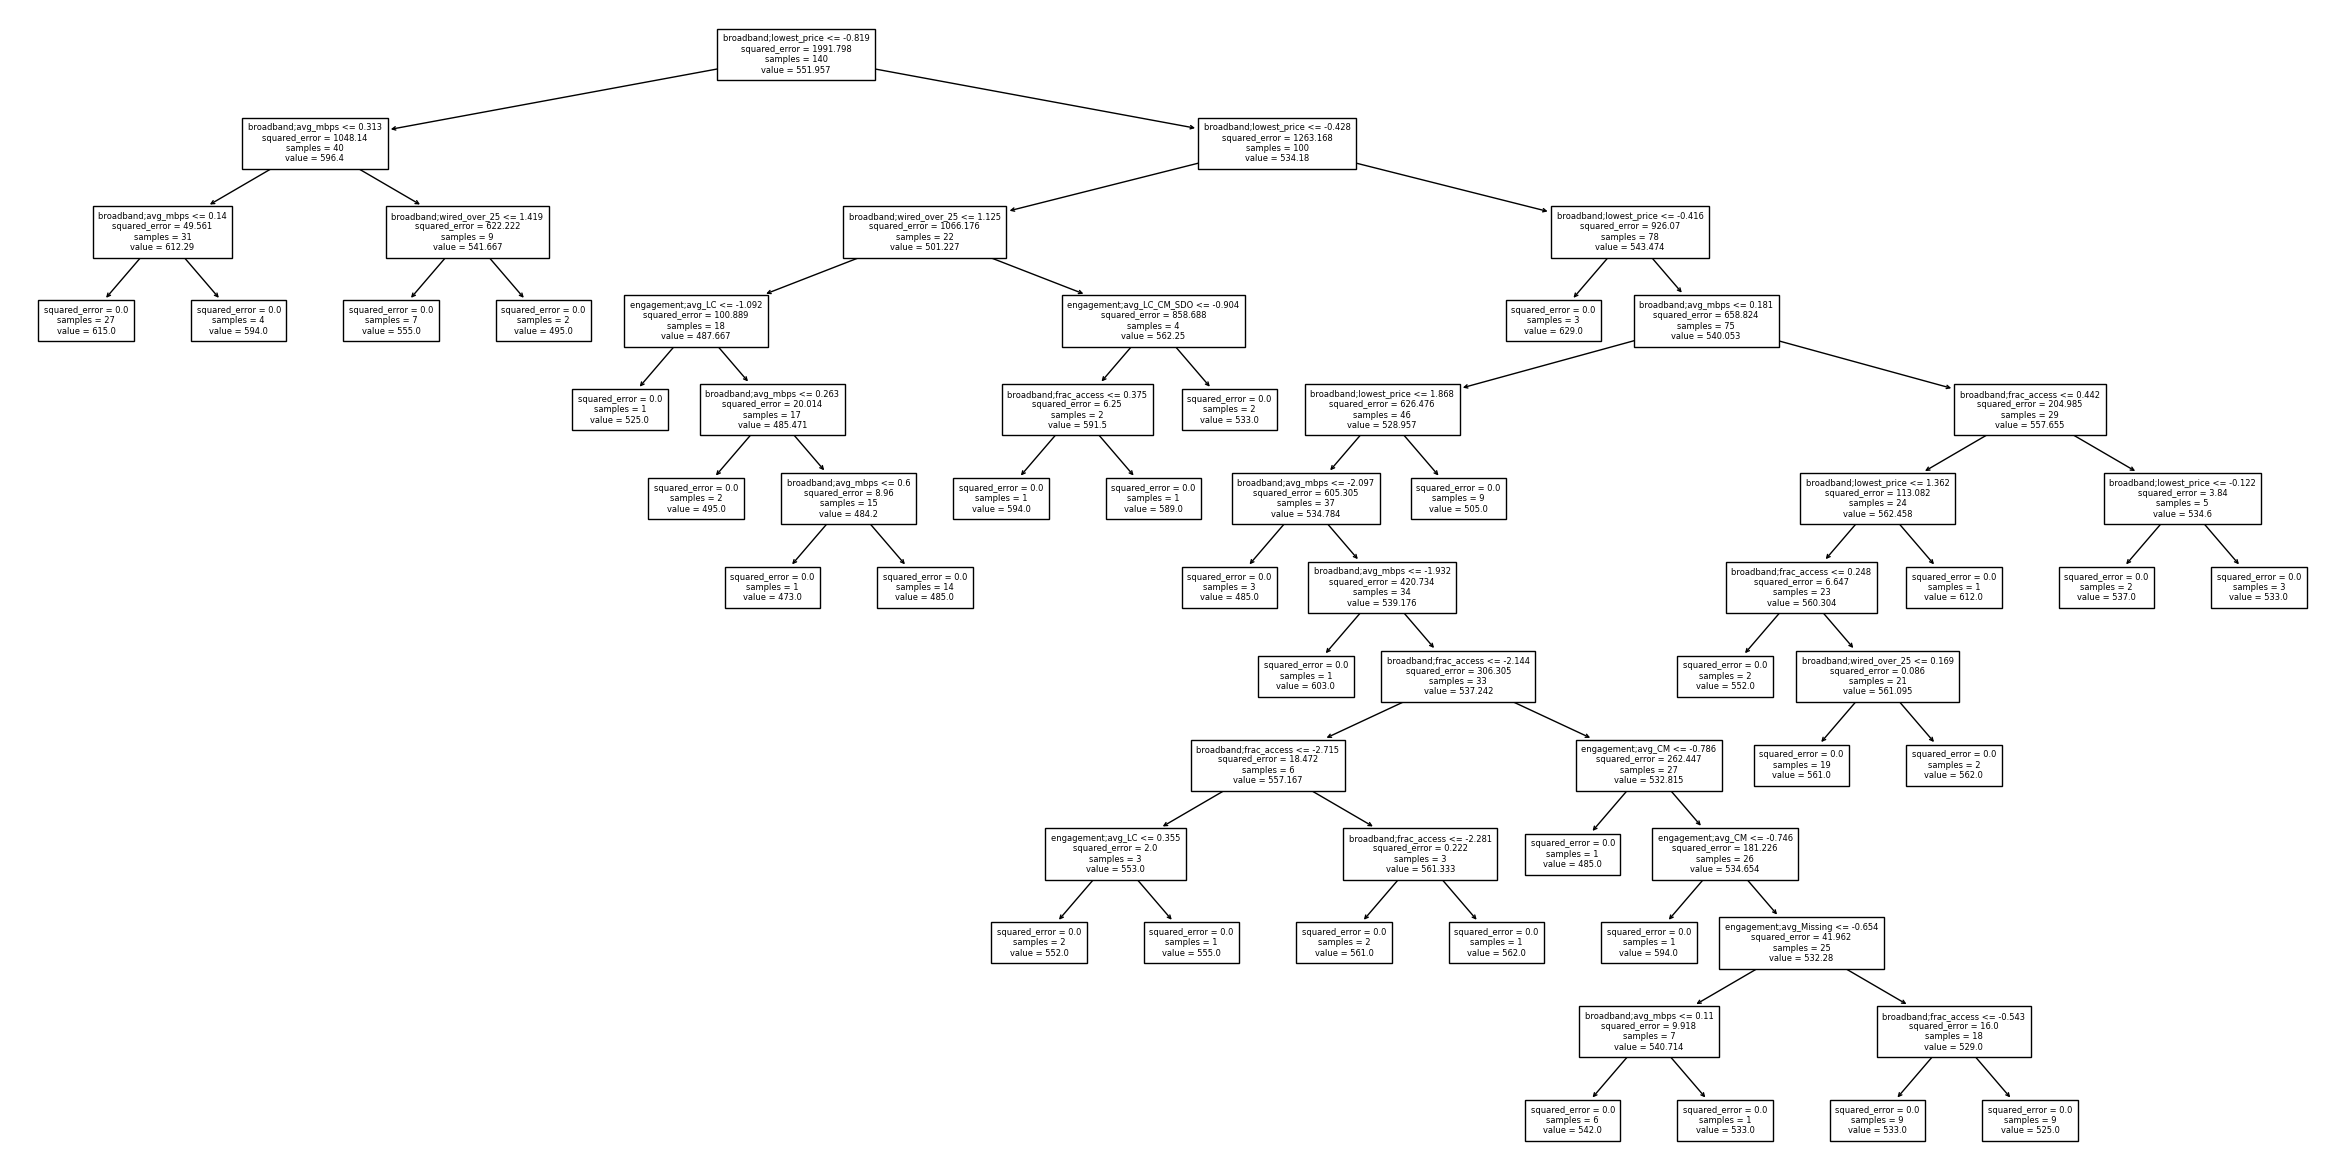

In [21]:
fig, ax = plt.subplots(figsize=(30,15))
plot_tree(five_fold_results[0][0]['estimator'][0]['decisiontreeregressor'], 
          feature_names=['engagement;avg_SDO',
                         'engagement;avg_CM',
                         'engagement;avg_LC', 
                         'engagement;avg_LC_CM_SDO', 
                         'engagement;avg_Missing',
                         'districts;locale_city', 
                         'districts;locale_suburb', 
                         'districts;locale_town',
                         'districts;locale_rural',
                         'broadband;wired_over_25',
                         'broadband;avg_mbps', 
                         'broadband;frac_access', 
                         'broadband;lowest_price'],
          filled=False,
          fontsize=6,
          ax=ax);

<a id='tree1d_model'></a>

## Decision Tree 1d: Predict SAT Scores from All Data

[(Back to top)](#models)

In [22]:
FEATURES = ['engagement;avg_SDO',
            'engagement;avg_CM',
            'engagement;avg_LC', 
            'engagement;avg_LC_CM_SDO', 
            'engagement;avg_Missing',
            'districts;locale_city', 
            'districts;locale_suburb', 
            'districts;locale_town',
            'districts;locale_rural',
            'broadband;wired_over_25',
            'broadband;avg_mbps', 
            'broadband;frac_access', 
            'broadband;lowest_price']

TARGETS = ['testscores;sat_math_delta', 
           'testscores;sat_ebrw_delta']

five_fold_results = run_experiment(dataset, 
                                   FEATURES,
                                   TARGETS,
                                   DecisionTreeRegressor(), 
                                   n_splits=5)


Dataset for testscores;sat_math_delta has 176 samples after filtering
Dataset for testscores;sat_ebrw_delta has 176 samples after filtering


<a id='tree1d_results'></a>

### Decision Tree 1d Testing Results

[(Back to top)](#models)

In [23]:
print_results(five_fold_results, splits=['test'])

,testscores;sat_math_delta
test_r2,-0.7082
test_root_mean_squared_error,14.5787


testscores;sat_math_delta: 14.5787


,testscores;sat_ebrw_delta
test_r2,-0.6971
test_root_mean_squared_error,14.9555


testscores;sat_ebrw_delta: 14.9555


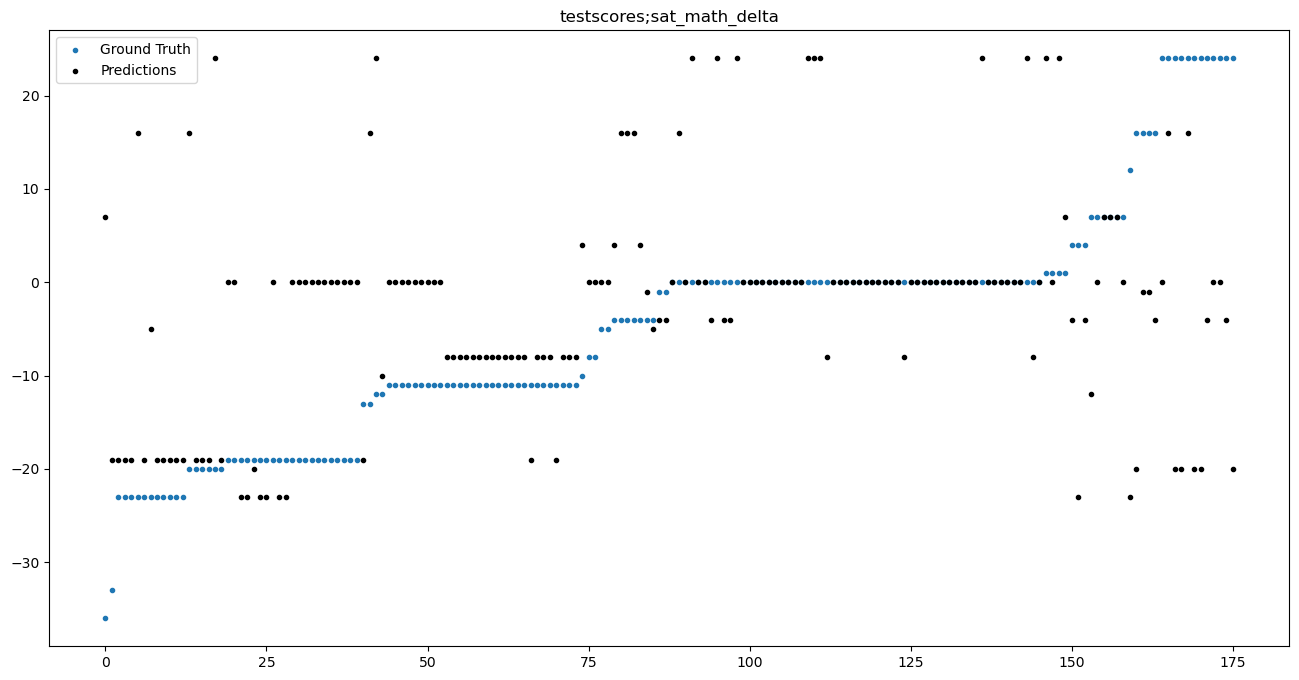

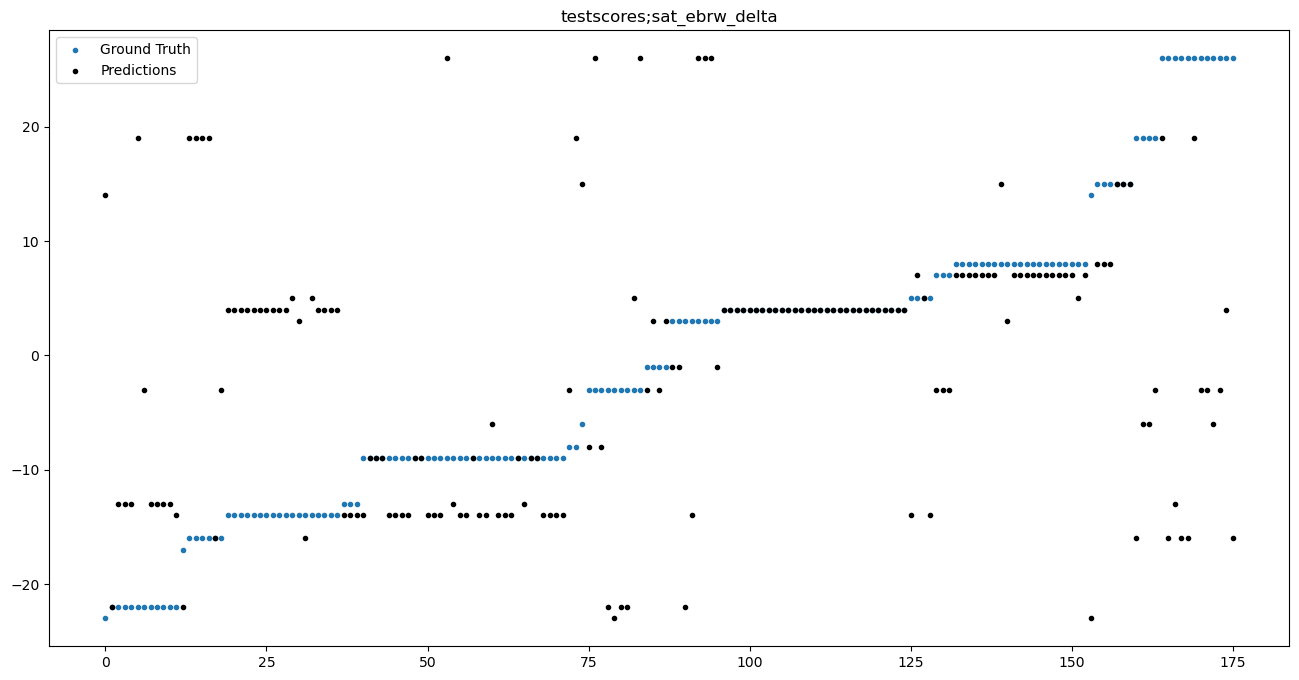

In [24]:
plot_residuals(five_fold_results)

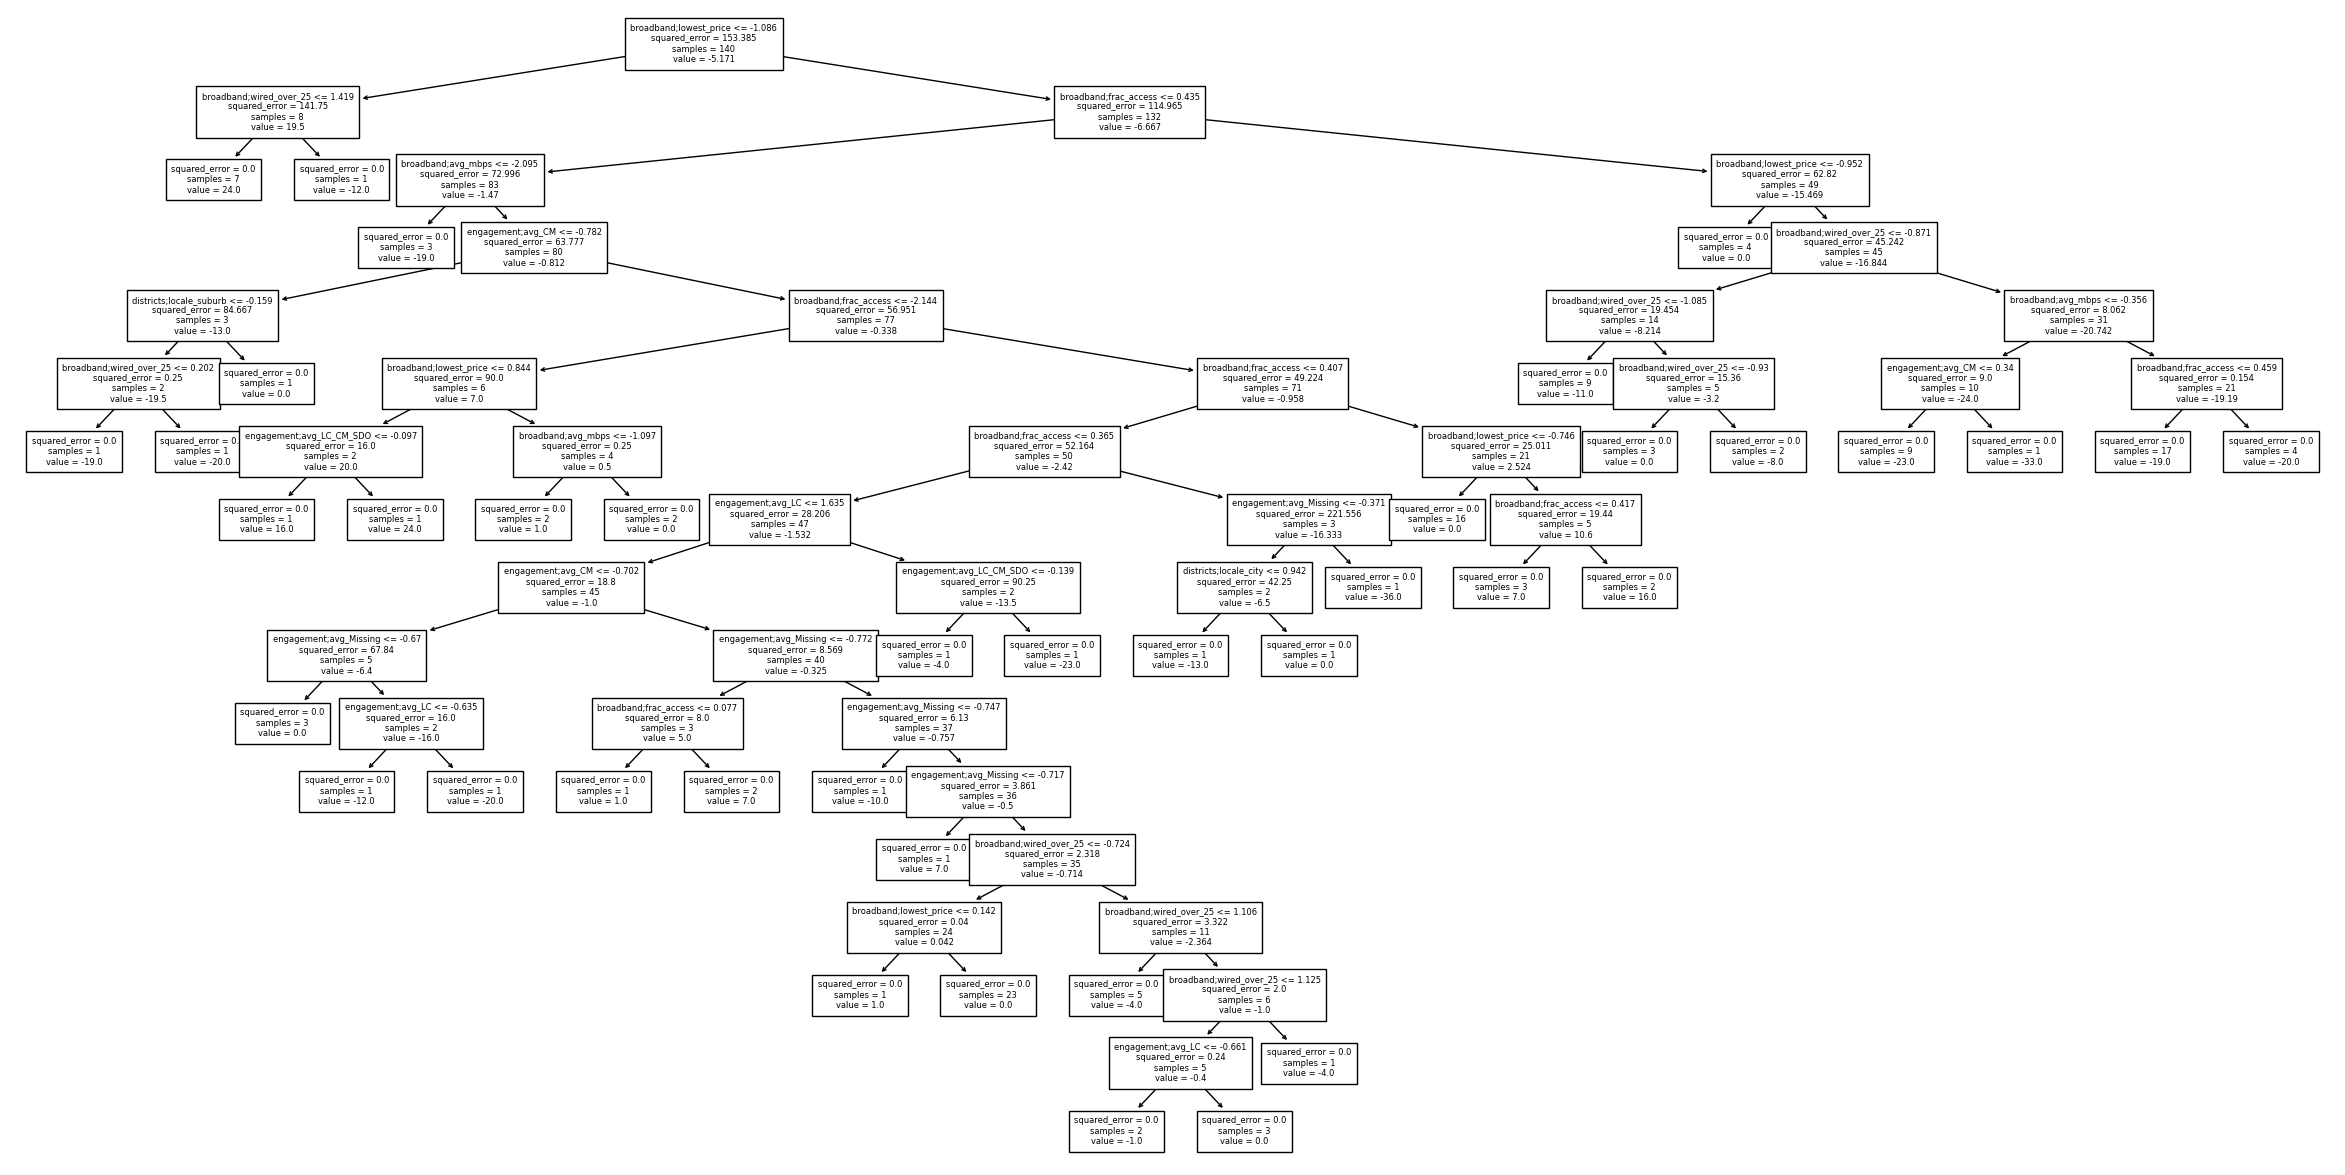

In [25]:
fig, ax = plt.subplots(figsize=(30,15))
plot_tree(five_fold_results[0][0]['estimator'][0]['decisiontreeregressor'], 
          feature_names=['engagement;avg_SDO',
                         'engagement;avg_CM',
                         'engagement;avg_LC', 
                         'engagement;avg_LC_CM_SDO', 
                         'engagement;avg_Missing',
                         'districts;locale_city', 
                         'districts;locale_suburb', 
                         'districts;locale_town',
                         'districts;locale_rural',
                         'broadband;wired_over_25',
                         'broadband;avg_mbps', 
                         'broadband;frac_access', 
                         'broadband;lowest_price'],
          filled=False,
          fontsize=6,
          ax=ax);

-------------